## Perkenalan


**Objective**

Predict Rain Tomorrow in Australia with some feature such as Location, Temp, Humidity, Date, Rain Today, etc. 


**Context**

Predict next-day rain by training classification models on the target variable RainTomorrow.

**Content**

This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

Source & Acknowledgements

Observations were drawn from numerous weather stations. The daily observations are available from http://www.bom.gov.au/climate/data.
An example of latest weather observations in Canberra: http://www.bom.gov.au/climate/dwo/IDCJDW2801.latest.shtml

Definitions adapted from http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml
Data source: http://www.bom.gov.au/climate/dwo/ and http://www.bom.gov.au/climate/data.

Copyright Commonwealth of Australia 2010, Bureau of Meteorology.

## Import pustaka yang dibutuhkan

In [1]:
!pip install opendatasets --q

In [2]:
import opendatasets as od
import matplotlib.pyplot as plt
import matplotlib
import os
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Data Loading


The dataset is available at https://www.kaggle.com/jsphyg/weather-dataset-rattle-package.

In [3]:
od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Your Kaggle Key: Downloading weather-dataset-rattle-package.zip to .\weather-dataset-rattle-package


100%|██████████| 3.83M/3.83M [00:04<00:00, 905kB/s]

In [4]:
os.listdir('weather-dataset-rattle-package')

['weatherAUS.csv']

In [5]:
dataset = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')

In [6]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
# Check Ukuran Data
dataset.shape

(145460, 23)

## Data Cleaning

In [9]:
# Check Informasi data: missing data, tipe data, dan jumlah data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [10]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [11]:
# Check Persentase data yang hilang

(dataset.isnull().sum()/len(dataset))*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [12]:
df = dataset.copy()

Kita akan hapus 'RainToday', 'RainTomorrow' karena terjadinya hujan adalah dependent terhadap feature lain

In [13]:
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

Kita akan hapus data yang missing lebih dari 30%

In [14]:
df.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   WindGustDir    131624 non-null  object 
 6   WindGustSpeed  131682 non-null  float64
 7   WindDir9am     131127 non-null  object 
 8   WindDir3pm     137117 non-null  object 
 9   WindSpeed9am   139732 non-null  float64
 10  WindSpeed3pm   138256 non-null  float64
 11  Humidity9am    139270 non-null  float64
 12  Humidity3pm    137286 non-null  float64
 13  Pressure9am    127044 non-null  float64
 14  Pressure3pm    127018 non-null  float64
 15  Temp9am        140131 non-null  float64
 16  Temp3pm        138163 non-null  float64
 17  RainToday      140787 non-nul

In [16]:
# membagi dataframe menjadi dua tipe data
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes('object').columns.tolist()

In [17]:
df[numeric_cols]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9
145455,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4
145456,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5
145457,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1


##### Distribution Plot

C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

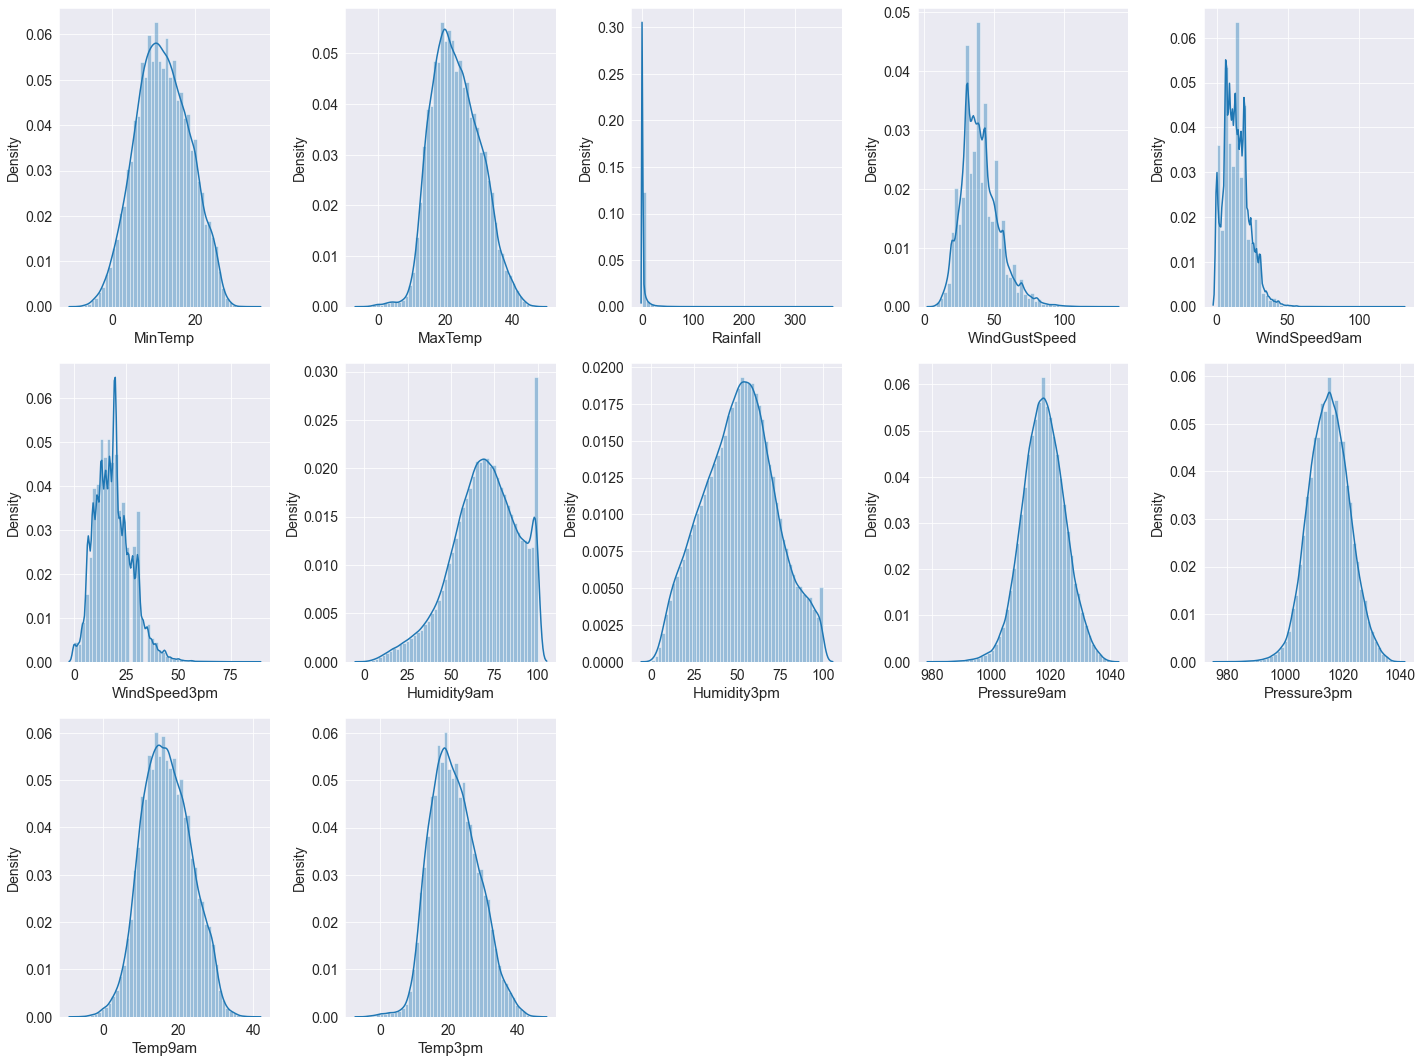

In [18]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df[numeric_cols]:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

Dari distribution plot diatas RainFall, WindGustSpeed, WindSpeed3pm, Humidity9am extremly tidak berdistribusi normal

In [19]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,140319.000000,140480.00000,140787.000000,131682.000000,139732.000000,138256.000000,139270.000000,137286.000000,127044.000000,127018.000000,140131.000000,138163.000000
mean,12.184824,23.23512,2.349974,39.970520,13.990496,18.631141,68.826833,51.449288,1017.654577,1015.257963,16.987066,21.693183
std,6.403879,7.11450,8.465173,13.578201,8.886210,8.798096,19.063650,20.807310,7.104867,7.035411,6.496012,6.937784
min,-8.500000,-4.80000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000
25%,7.600000,17.90000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.400000,12.300000,16.600000
50%,12.000000,22.60000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,16.700000,21.100000
75%,16.800000,28.30000,0.800000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,21.600000,26.400000
max,33.900000,48.10000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000


Input Missing values pada data kategorik dengan 'Unknown'

In [20]:
df[categorical_cols].isnull().sum()

Date               0
Location           0
WindGustDir     9163
WindDir9am      9660
WindDir3pm      3670
RainToday          0
RainTomorrow       0
dtype: int64

In [21]:
df['WindGustDir'].fillna('Unknown', inplace=True)

In [22]:
df['WindDir9am'].fillna('Unknown', inplace=True)

In [23]:
df['WindDir3pm'].fillna('Unknown', inplace=True)

In [24]:
df[categorical_cols].isnull().sum()

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [25]:
# Save data ke csv
df.to_csv('data_cleaned.csv', index=False)

In [26]:
data_cleaned = pd.read_csv('data_cleaned.csv')
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140787 entries, 0 to 140786
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   WindGustDir    140787 non-null  object 
 6   WindGustSpeed  131682 non-null  float64
 7   WindDir9am     140787 non-null  object 
 8   WindDir3pm     140787 non-null  object 
 9   WindSpeed9am   139732 non-null  float64
 10  WindSpeed3pm   138256 non-null  float64
 11  Humidity9am    139270 non-null  float64
 12  Humidity3pm    137286 non-null  float64
 13  Pressure9am    127044 non-null  float64
 14  Pressure3pm    127018 non-null  float64
 15  Temp9am        140131 non-null  float64
 16  Temp3pm        138163 non-null  float64
 17  RainToday      140787 non-nul

Split Date menjadi Year, Month, and Day

In [27]:
data_cleaned['Date'] = pd.to_datetime(data_cleaned.Date)

In [28]:
data_cleaned['Year'] = data_cleaned['Date'].dt.year

In [29]:
data_cleaned['Month'] = data_cleaned['Date'].dt.month

In [30]:
data_cleaned['Day'] = data_cleaned['Date'].dt.day

In [31]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140787 entries, 0 to 140786
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           140787 non-null  datetime64[ns]
 1   Location       140787 non-null  object        
 2   MinTemp        140319 non-null  float64       
 3   MaxTemp        140480 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   WindGustDir    140787 non-null  object        
 6   WindGustSpeed  131682 non-null  float64       
 7   WindDir9am     140787 non-null  object        
 8   WindDir3pm     140787 non-null  object        
 9   WindSpeed9am   139732 non-null  float64       
 10  WindSpeed3pm   138256 non-null  float64       
 11  Humidity9am    139270 non-null  float64       
 12  Humidity3pm    137286 non-null  float64       
 13  Pressure9am    127044 non-null  float64       
 14  Pressure3pm    127018 non-null  float64       
 15  

In [32]:
# drop Date
data_cleaned.drop(['Date'], axis=1, inplace=True)

In [33]:
data_cleaned.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,2008,12,5


In [34]:
data_cleaned.tail()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
140782,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No,2017,6,20
140783,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No,2017,6,21
140784,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No,2017,6,22
140785,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No,2017,6,23
140786,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No,2017,6,24


## Explorasi Data

In [35]:
data1 = pd.crosstab(data_cleaned.Location, data_cleaned.RainToday, normalize='index')

<Figure size 1440x2160 with 0 Axes>

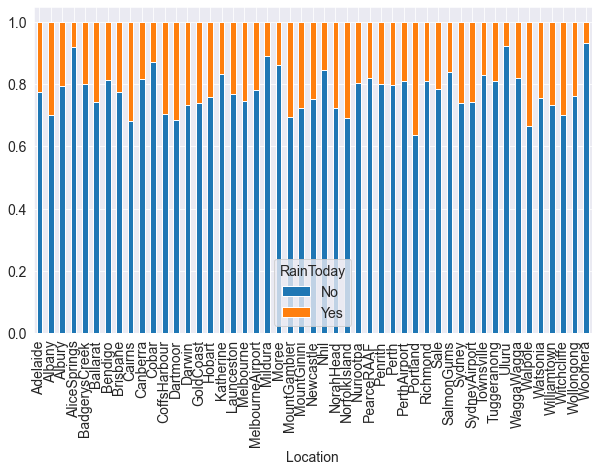

In [36]:
plt.figure(figsize = (20, 30))
data1.plot(kind='bar', stacked=True)
plt.show()

Presentase RainToday VS Location, disemua location presentase tidak hujan lebih besar diatas 70% 

<AxesSubplot:>

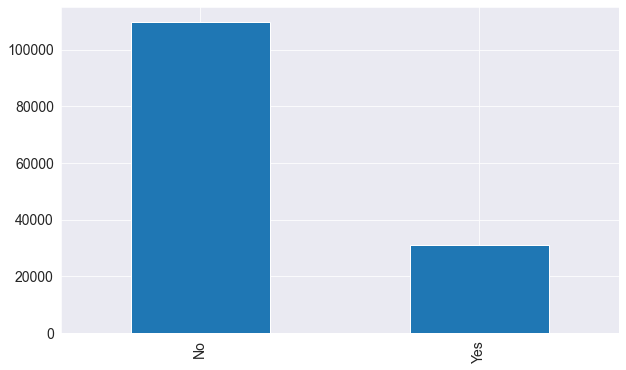

In [37]:
data_cleaned.RainTomorrow.value_counts().plot(kind='bar')

begitu juga Presentase RainTomorrow proporsi tidak hujan lebih besar daripada hujan yang artinya data inbalanced

In [38]:
data2 = pd.crosstab(data_cleaned.RainTomorrow, data_cleaned.RainToday, normalize='index')

Text(0.5, 1.0, 'Rain Tomorrow vs. Rain Today')

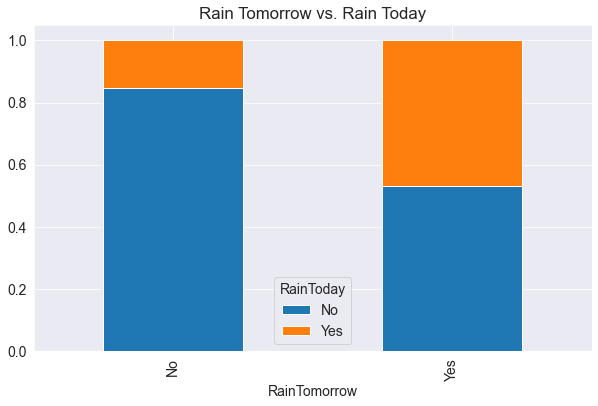

In [39]:
data2.plot(kind='bar', stacked=True)
plt.title('Rain Tomorrow vs. Rain Today')

Dari barplot diatas bisa dilihat bahwa untuk RainTomorrow == 'No' maka RainToday == 'No' memiliki presentase lebih dari 80% artinya jika hari ini tidak hujan maka besok memiliki lebih besar kemungkinan tidak hujan juga, sedangkan untuk RainTomorrow == 'Yes' maka RainToday memiliki proporsi yang cukup seimbang artinya jika hari ini hujan maka memiliki kemungkinan besok hujan approximately 50%

<AxesSubplot:xlabel='MinTemp', ylabel='MaxTemp'>

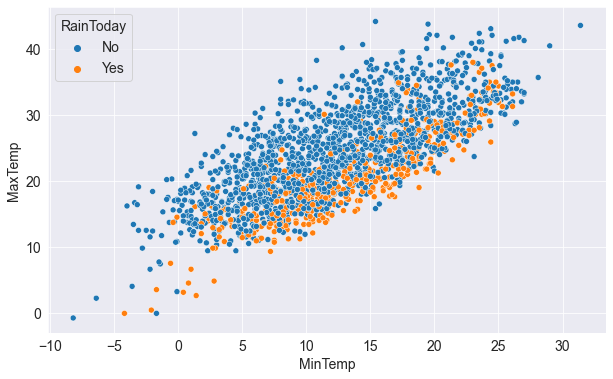

In [40]:
sns.scatterplot(data=data_cleaned.sample(2000), x="MinTemp", y="MaxTemp", hue="RainToday")

dari sample yang diambil diatas dapat disimpulkan dengan  lebih besar dari 5 dan MaxTemp yang lebih rendah20 pada hari itu memiliki peluang hujan lebih besar

<AxesSubplot:xlabel='Temp3pm', ylabel='Humidity3pm'>

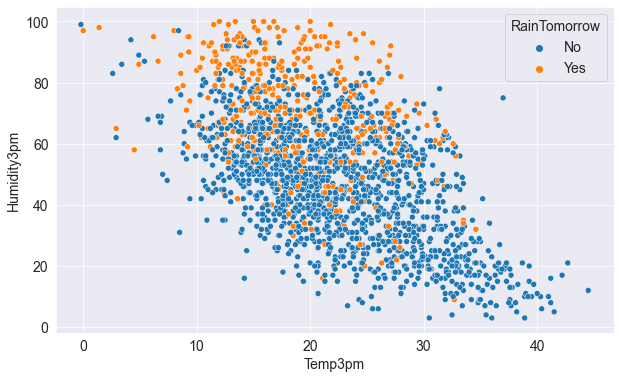

In [41]:
sns.scatterplot(data=data_cleaned.sample(2000), x="Temp3pm", y="Humidity3pm", hue="RainTomorrow")

dari sample yang diambil diatas dapat disimpulkan dengan Temp3pm yang lebih rendah dari 20 dan Humidity3pm tinggi dari 60 maka memiliki peluang hujan pada besok hari lebih besar

In [42]:
numeric_cols = data_cleaned.select_dtypes(include=np.number).columns.tolist()
categorical_cols = data_cleaned.select_dtypes('object').columns.tolist()

In [43]:
all_data_boxplot = data_cleaned[numeric_cols].iloc[:, 0:12]
all_data_boxplot

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...
140782,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9
140783,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4
140784,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5
140785,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1


C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

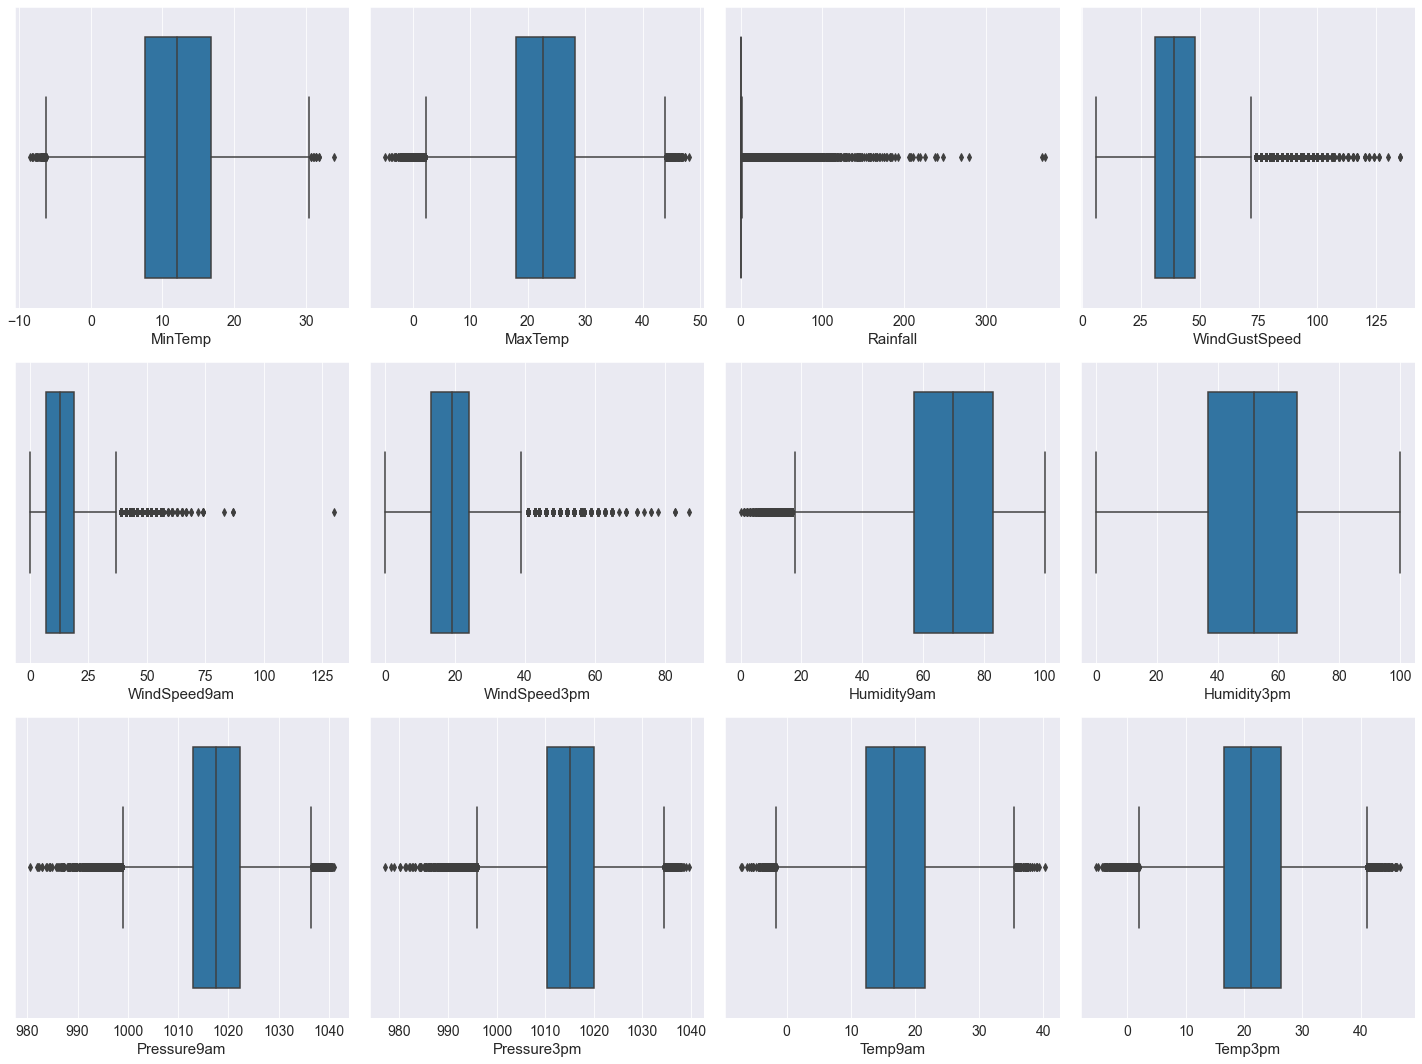

In [44]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in all_data_boxplot:
    if plotnumber <= 13:
        ax = plt.subplot(3, 4, plotnumber)
        sns.boxplot(all_data_boxplot[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

dari boxplot diatas untuk data numerik hampir semua memiliki outlier, kita akan bandingkan dengan data dengan tahun >= 2015

In [45]:
data_more2015 = data_cleaned[data_cleaned['Year'] >= 2015]
data_more2015.shape

(42799, 21)

In [46]:
data_more2015_boxplot = data_more2015[numeric_cols].iloc[:, 0:12]
data_more2015_boxplot

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
2092,11.4,33.5,0.0,30.0,7.0,11.0,45.0,14.0,1013.5,1011.0,21.0,32.7
2093,15.5,39.6,0.0,56.0,9.0,9.0,45.0,12.0,1016.0,1012.4,25.6,38.2
2094,17.1,38.3,0.0,48.0,20.0,20.0,35.0,19.0,1017.9,1012.3,29.2,37.0
2095,26.0,33.1,0.0,41.0,7.0,7.0,46.0,37.0,1013.6,1012.1,27.4,30.9
2096,19.0,35.2,0.0,33.0,7.0,9.0,60.0,34.0,1017.4,1014.7,25.6,32.5
...,...,...,...,...,...,...,...,...,...,...,...,...
140782,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9
140783,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4
140784,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5
140785,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1


C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

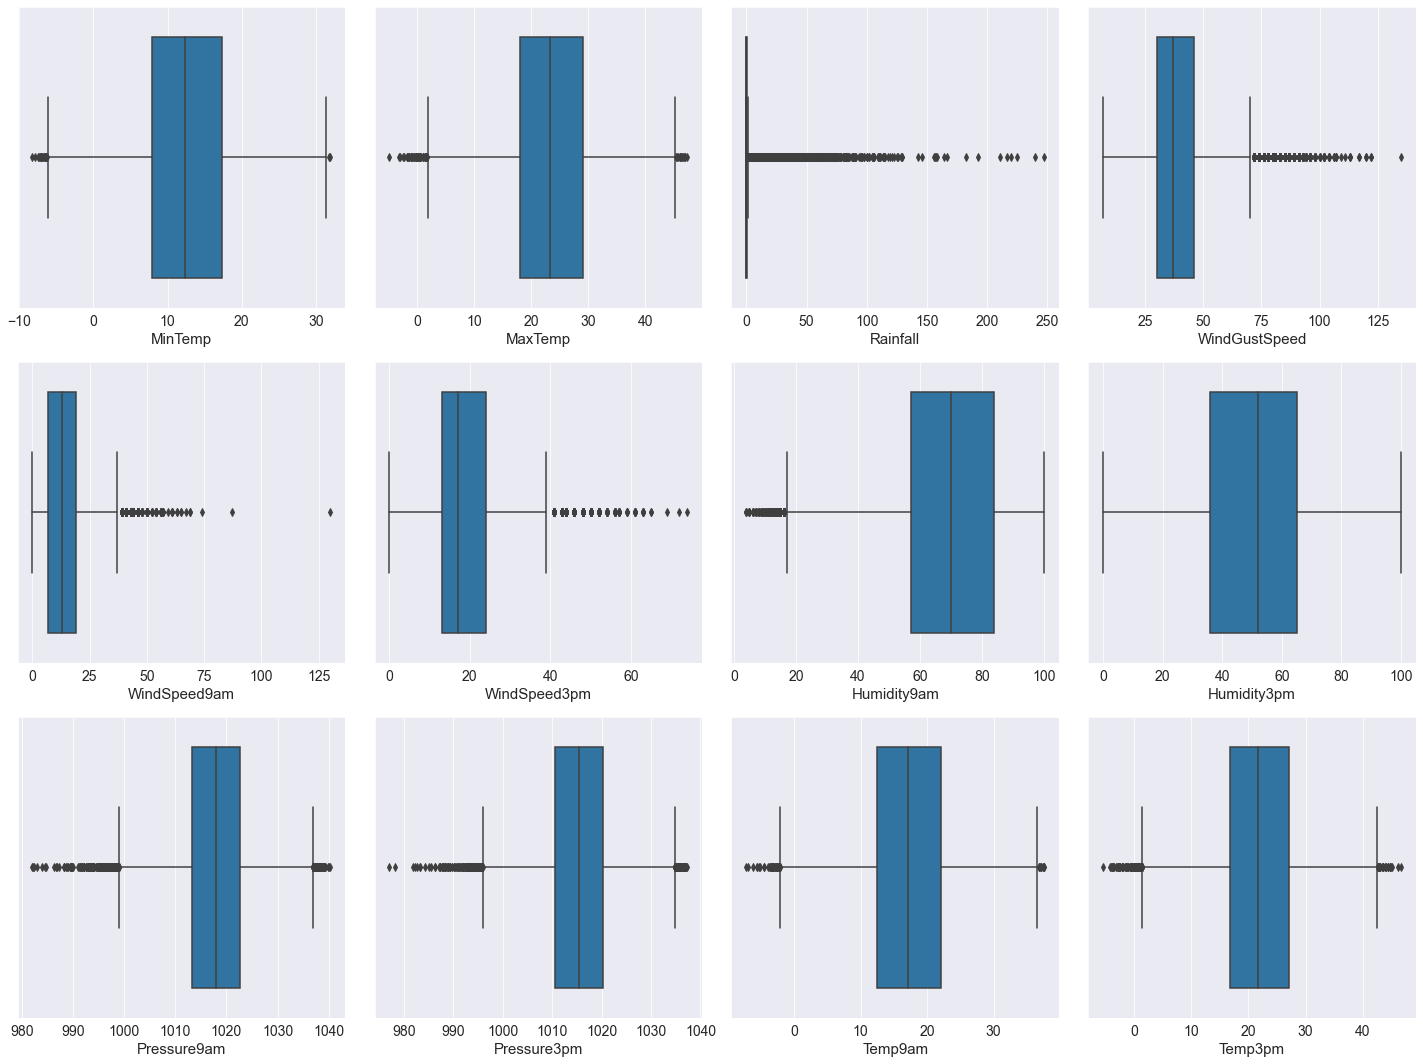

In [47]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in data_more2015_boxplot:
    if plotnumber <= 13:
        ax = plt.subplot(3, 4, plotnumber)
        sns.boxplot(data_more2015_boxplot[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

Dari boxplot diatas hampir data >= 2015 memiliki Outlier artinya data 2.5 tahun dan data 10 tahun memiliki outlier yang sama disetiap feature sehingga kita putuskan untuk tidak menghapus outlier, selanjutnya data >= 2015 ini kita akan jadikan sample untuk dilakukan model Machine Learning lebih lanjut

## Data Preprocessing

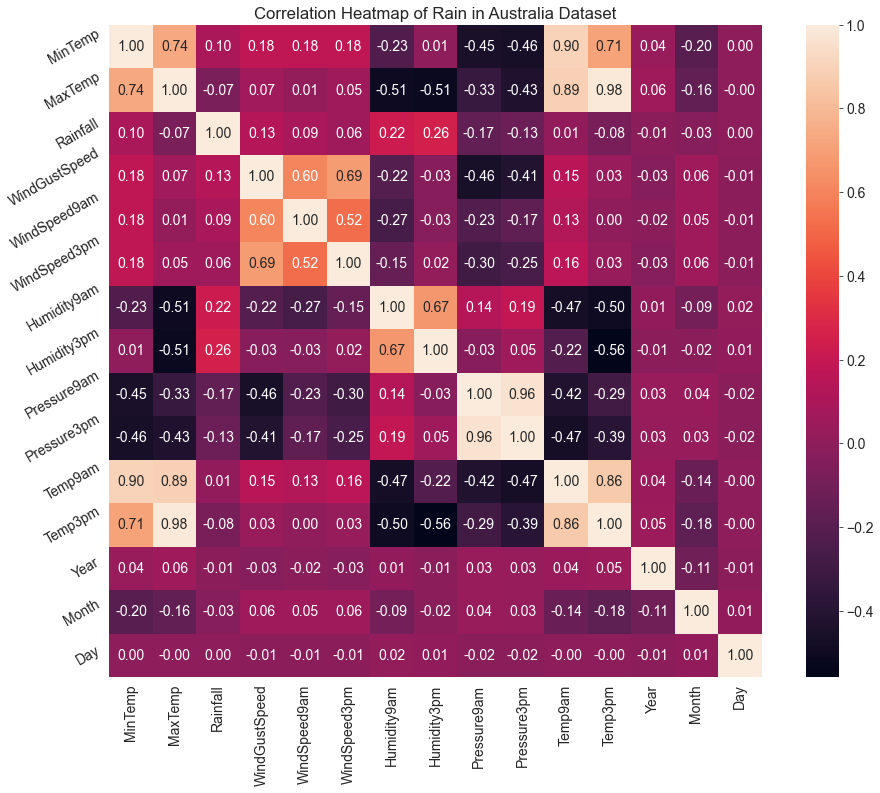

In [48]:
correlation = data_cleaned[numeric_cols].corr()

plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

Interpretation
From the above correlation heat map, we can conclude that :-

MinTemp and MaxTemp variables are highly positively correlated (correlation coefficient = 0.74).

MinTemp and Temp3pm variables are also highly positively correlated (correlation coefficient = 0.71).

MinTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.90).

MaxTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.89).

MaxTemp and Temp3pm variables are also strongly positively correlated (correlation coefficient = 0.98).

WindGustSpeed and WindSpeed3pm variables are highly positively correlated (correlation coefficient = 0.69).

Pressure9am and Pressure3pm variables are strongly positively correlated (correlation coefficient = 0.96).

Temp9am and Temp3pm variables are strongly positively correlated (correlation coefficient = 0.86).

Kita akan hapus feature yang memiliki korelasi antar feature diatas 0.8

In [49]:
drop_cols = ['Temp3pm', 'Temp9am', 'Pressure9am',  'Pressure3pm']

data_cleaned.drop(drop_cols, axis=1, inplace=True)

In [50]:
data_cleaned.shape

(140787, 17)

In [56]:
data_cleaned = data_cleaned[data_cleaned['Year'] >= 2015]

In [57]:
X = data_cleaned.drop(['RainTomorrow'], axis=1)
y = data_cleaned['RainTomorrow']

In [58]:
data_cleaned.shape

(42799, 17)

In [59]:
X.shape

(42799, 16)

In [60]:
y.shape

(42799,)

#### Splitting data

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

Membuat Pipeline untuk feature numeric dan feature categoric

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

numerical_pipeline = Pipeline([
                               ("imputer", SimpleImputer(strategy='median')),
                               ("scaler", MinMaxScaler())
                               ])

categorical_pipeline = Pipeline([
                                 ("onehot", OneHotEncoder())
                                 ])

In [63]:
numeric_cols = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train.select_dtypes('object').columns.tolist()

Menggabungkan pipeline dengan column transformer

In [64]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
                                  ("numeric", numerical_pipeline, numeric_cols),
                                  ("categoric", categorical_pipeline, categorical_cols)
])

## Pendefinisian Model

Pada bagian ini kita membuat **Baseline Model** yaitu model sederhana dengan model default dari library sklearn tanpa memberikan hyperparameter khusus

### Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
pipeline_clf = Pipeline([
                      ("prep_clf", preprocessor),
                      ("algo_clf", clf)
])

### Support Vector Machine

In [66]:
from sklearn.svm import SVC
svm = SVC()
pipeline_svm = Pipeline([
                      ("prep_svm", preprocessor),
                      ("algo_svm", svm)
                      
])

## Pelatihan Model

### Logistic Regression

In [67]:
pipeline_clf.fit(X_train, y_train)

C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('prep_clf',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Year', 'Month', 'Day']),
                                                 ('categoric',
                                                  Pipeline(

In [68]:
# Accuracy Score untuk data train

pipeline_clf.score(X_train, y_train)

0.844942901369783

In [69]:
# Accuracy Score untuk data test

pipeline_clf.score(X_test, y_test)

0.8449766355140187

Dari accuracy data train dan data test menghasilkan accuracy yang cukup tinggi yaitu 0.845, namun untuk kasus data inbalanced nilai accuracy tersebut kurang bisa digunakan sebagai acuan karena hanya menghitung prediksi yang benar di bagi total kesuluruhan data untuk kasus ini data RainTomorrow=='No' memiliki proporsi yang lebih besar sedangkan RainTomorrow=='Yes' memiliki proporsi yang lebih kecil sehingga banyak terjadi bias, selanjutnya akan digunakan metode lain seperti precision, F1-score, recall dsb

In [70]:
y_pred = pipeline_clf.predict(X_test)

Confusion Matrix

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[6358,  321],
       [1006,  875]], dtype=int64)

Dari confusion matrix diatas dapat disimpukan bahwa model dapat memprediksi dengan benar RainTomorrow=='No' sebanyak 6358, RainTomorrow=='Yes' sebanyak 875, memprediksi RainTomorrow=='Yes' namun aktual nya RainTomorrow=='No' sebanyak 321, memprediksi RainTomorrow=='No' namun aktual nya RainTomorrow=='Yes' sebanyak 1006

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.95      0.91      6679
         Yes       0.73      0.47      0.57      1881

    accuracy                           0.84      8560
   macro avg       0.80      0.71      0.74      8560
weighted avg       0.83      0.84      0.83      8560



Dari kasus prediksi RainTomorrow bahwa kita akan menggunakan precision dan recall sebagai ganti dari accuracy karena kita lebih memperhatikan salah prediksi tidak hujan sedangkan kejadian sebenarnya hujan.

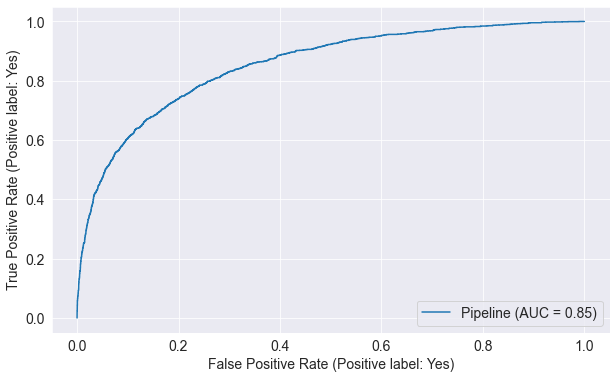

In [73]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(pipeline_clf, X_test, y_test)

### Support Vector Machine

In [74]:
pipeline_svm.fit(X_train, y_train)

Pipeline(steps=[('prep_svm',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Year', 'Month', 'Day']),
                                                 ('categoric',
                                                  Pipeline(

In [75]:
pipeline_svm.score(X_train, y_train)

0.8720757031455358

In [76]:
pipeline_svm.score(X_test, y_test)

0.8473130841121496

In [77]:
y_pred = pipeline_svm.predict(X_test)

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[6428,  251],
       [1056,  825]], dtype=int64)

Dari confusion matrix diatas dapat disimpukan bahwa model dapat memprediksi dengan benar RainTomorrow=='No' sebanyak 6428, RainTomorrow=='Yes' sebanyak 825, memprediksi RainTomorrow=='Yes' namun aktual nya RainTomorrow=='No' sebanyak 251, memprediksi RainTomorrow=='No' namun aktual nya RainTomorrow=='Yes' sebanyak 1056

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.96      0.91      6679
         Yes       0.77      0.44      0.56      1881

    accuracy                           0.85      8560
   macro avg       0.81      0.70      0.73      8560
weighted avg       0.84      0.85      0.83      8560



Dari kasus prediksi RainTomorrow bahwa kita akan menggunakan precision dan recall sebagai ganti dari accuracy karena kita lebih memperhatikan salah prediksi tidak hujan sedangkan kejadian sebenarnya hujan.

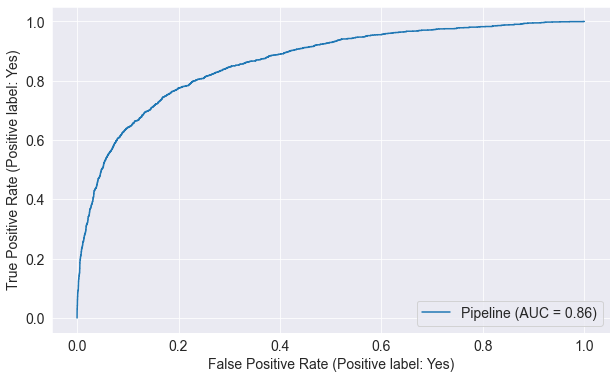

In [80]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(pipeline_svm, X_test, y_test)

## Evaluasi Model

Pada bagian evaluasi model kita mencoba menggunakan beberapa hyperparameter dan memilih hyperparameter yang terbaik untuk meningkatkan performa model

### Hyperparameter Tuning Logistic Regression

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
pipeline_clf = Pipeline([
                      ("prep_clf", preprocessor),
                      ("algo_clf", clf)
])

In [83]:
parameter_clf = {
    "algo_clf__penalty":  ['l1', 'l2'],
    "algo_clf__C": np.logspace(-4, 4, 20),
    "algo_clf__solver": ['liblinear']

}

model_clf = GridSearchCV(pipeline_clf, param_grid= parameter_clf, cv = 5, n_jobs=-1, verbose=1)

In [84]:
model_clf.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep_clf',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['MinTemp',
                                                                          'MaxTemp',
                                                                          'Rainfall',
                                                                          'WindGustSpeed',
                                                               

In [85]:
pd.DataFrame(model_clf.cv_results_).sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo_clf__C,param_algo_clf__penalty,param_algo_clf__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
22,17.630936,0.996064,0.063197,0.006843,4.281332,l1,liblinear,"{'algo_clf__C': 4.281332398719396, 'algo_clf__...",0.848715,0.843312,0.841998,0.842436,0.841829,0.843658,0.002580,1
26,50.830622,3.384777,0.046873,0.013613,29.763514,l1,liblinear,"{'algo_clf__C': 29.763514416313132, 'algo_clf_...",0.848715,0.843166,0.841852,0.842290,0.841682,0.843541,0.002638,2
25,0.838306,0.041785,0.070196,0.005279,11.288379,l2,liblinear,"{'algo_clf__C': 11.288378916846883, 'algo_clf_...",0.848423,0.842728,0.842144,0.842582,0.841536,0.843483,0.002505,3
24,30.019093,6.693591,0.058056,0.006296,11.288379,l1,liblinear,"{'algo_clf__C': 11.288378916846883, 'algo_clf_...",0.848569,0.843166,0.841852,0.842144,0.841536,0.843453,0.002616,4
23,0.745060,0.011193,0.055443,0.002985,4.281332,l2,liblinear,"{'algo_clf__C': 4.281332398719396, 'algo_clf__...",0.848423,0.842874,0.842436,0.842290,0.841244,0.843453,0.002542,5


In [86]:
model_clf.best_params_

{'algo_clf__C': 4.281332398719396,
 'algo_clf__penalty': 'l1',
 'algo_clf__solver': 'liblinear'}

In [87]:
y_pred = model_clf.predict(X_test)

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.95      0.91      6679
         Yes       0.73      0.47      0.57      1881

    accuracy                           0.85      8560
   macro avg       0.80      0.71      0.74      8560
weighted avg       0.84      0.85      0.83      8560



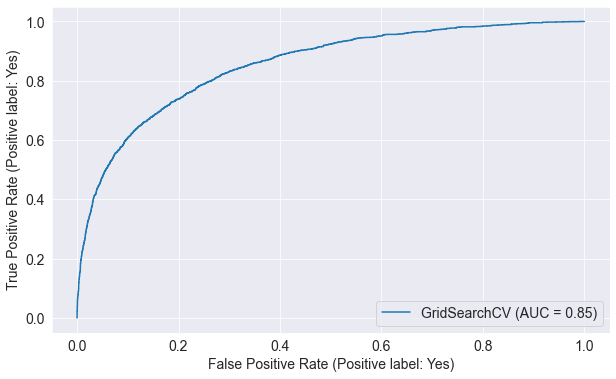

In [89]:
RocCurveDisplay.from_estimator(model_clf, X_test, y_test)

### Hyperparameter Tuning SVM

In [90]:
from sklearn.model_selection import RandomizedSearchCV 
parameter_svm = {
    "algo_svm__C":  [0.1, 1, 10],
    "algo_svm__gamma": [1, 0.1, 0.01],
    "algo_svm__kernel": ['rbf', 'sigmoid']

}

model_svm = RandomizedSearchCV(pipeline_svm, param_distributions = parameter_svm, cv=5, n_jobs=-1, verbose=1)

In [91]:
model_svm.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prep_svm',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                MinMaxScaler())]),
                                                                               ['MinTemp',
                                                                                'MaxTemp',
                                                                                'Rainfall',
                                                                                'WindGustSpeed

In [92]:
model_svm.cv_results_

{'mean_fit_time': array([ 88.64853668,  85.79708099, 627.1210423 ,  90.0820106 ,
        109.25384021, 217.71283226,  66.71096878, 265.43836532,
         67.78741136,  53.97912145]),
 'std_fit_time': array([ 3.65430952,  7.99738518, 15.10813425,  7.20134048,  7.22018437,
        14.86034351,  1.88458092, 16.82210646,  2.85553538, 11.36860286]),
 'mean_score_time': array([14.52639618, 12.90966477, 25.70209894, 13.62913876, 14.38799105,
        10.3800096 ,  9.89865513, 21.09208193, 11.41620111,  6.61027532]),
 'std_score_time': array([1.4842461 , 1.37662846, 1.55804179, 0.629952  , 2.27788877,
        0.63459061, 0.36137173, 1.82263173, 0.57137993, 2.51270496]),
 'param_algo_svm__kernel': masked_array(data=['rbf', 'sigmoid', 'rbf', 'sigmoid', 'rbf', 'rbf',
                    'sigmoid', 'rbf', 'rbf', 'sigmoid'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_algo_s

In [93]:
y_pred = model_svm.predict(X_test)

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.96      0.91      6679
         Yes       0.77      0.43      0.55      1881

    accuracy                           0.85      8560
   macro avg       0.81      0.70      0.73      8560
weighted avg       0.84      0.85      0.83      8560



In [95]:
model_svm.best_params_

{'algo_svm__kernel': 'rbf', 'algo_svm__gamma': 0.01, 'algo_svm__C': 10}

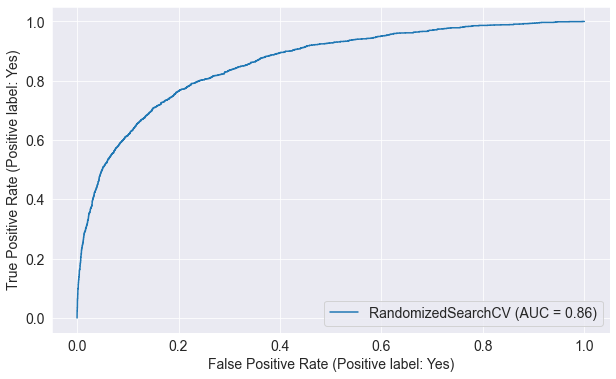

In [96]:
RocCurveDisplay.from_estimator(model_svm, X_test, y_test)

Dari Hasil Hyperparameter Tuning didapatkan masing model terbaik untuk Model LogisticRegression C: 4.281332398719396, penalty: 'l1', dan solver: 'liblinear'. untuk Model SVM kernel: 'rbf', gamma: 0.01, C: 10, namun dengan pemilihan hyperparameter yang terbaik yang diberikan hasil nya sama dengan baseline model

## Model Inference

### Logistic Regression and SVM

In [97]:
X_train.iloc[0:1]

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,Year,Month,Day
95769,Adelaide,13.7,23.9,0.0,E,20.0,SE,WSW,4.0,11.0,55.0,48.0,No,2017,4,16


In [98]:
data = [
        ["GoldCoast", 12.0, 20.0, 1.2, "SSE", 67.2, "S", "Unknown", 19.0, 20.2, 65.0, 40.0, "Yes", 2015, 8, 11],
        ["Albany", 12.5, 10.0, 0.0, "S", 44, "WNW", "W", 4.0, 22.0, 58.0, 50.0, "Yes", 2015, 10, 11.2]
      ]
X_pred = pd.DataFrame(data, index=[1, 2], columns=X.columns)
X_pred

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,Year,Month,Day
1,GoldCoast,12.0,20.0,1.2,SSE,67.2,S,Unknown,19.0,20.2,65.0,40.0,Yes,2015,8,11.0
2,Albany,12.5,10.0,0.0,S,44.0,WNW,W,4.0,22.0,58.0,50.0,Yes,2015,10,11.2


In [99]:
# Logistic Regression
model_clf.predict(X_pred)

array(['No', 'No'], dtype=object)

In [100]:
# SVM
model_svm.predict(X_pred)

array(['No', 'No'], dtype=object)

Dari 2 data baru yang diberikan kedua model memberikan hasil yang sama yaitu memprediksi RainTomorrow dari kedua data yang diberikan dengan hasil prediksi tidak hujan dengan nilai precision 0.86 untuk kedua model

## Pengambilan Kesimpulan

Dengan menggunakan metode Logistic Regression dan SVM kita bisa memprediksi terjadi nya hujan pada esok hari dengan precision besok tidak hujan 86% sedangkan untuk memperdiksi besok terjadi hujan dengan recall 43%.

Untuk mendapatkan hasil yang lebih baik perlu dicoba dengan menggunakan algoritma yang lain seperti Decision Tree, RandomForest dan lain sebagainya atau menemukan hyperparameter yang lebih bagus